In [1]:
using Revise
using QuantumDynamics
using Plots, LaTeXStrings

In [2]:
H = Utilities.create_tls_hamiltonian(; ϵ=0.0, Δ=2)
ρ0 = [1.0+0.0im 0; 0 0]
β = 0.5
Jw = SpectralDensities.DrudeLorentz(; λ=1.5, γ=7.5)
dt = 0.125
ntimes = 200

200

In [3]:
barefbU = Propagators.calculate_bare_propagators(; Hamiltonian=H, dt, ntimes);
times, ρs = TNPI.propagate(; fbU=barefbU, Jw=[Jw], β, ρ0, dt, ntimes, kmax=100)

(0.0:0.125:25.0, [1.0 + 0.0im 0.0 + 0.0im; 0.9844562108553228 + 1.0144272338402492e-18im 0.003372434249360449 - 0.12037752987388933im; … ; 0.49995349981235804 - 4.304763778883016e-15im 0.21403997201504674 + 1.8155914267763925e-5im; 0.4999575026984142 - 2.6620448241869038e-15im 0.21403987305952046 + 1.6047359135276887e-5im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.0033724342493604313 + 0.12037752987388935im 0.015543789144677621 + 6.938893903907228e-18im; … ; 0.21403997201504876 - 1.8155914272951812e-5im 0.4999552058718854 - 5.440092820663267e-15im; 0.21403987305952168 - 1.6047359139438007e-5im 0.49995074050583904 - 4.9960036108132044e-15im])

In [4]:
times_HEOM, ρs_HEOM = HEOM.propagate(; Hamiltonian=H, ρ0, β, dt, ntimes, Jw=[Jw], sys_ops=[[1.0+0.0im 0.0; 0.0 -1.0]], num_modes=1, Lmax=2, extraargs=Utilities.DiffEqArgs(reltol=1e-8, abstol=1e-8))

([0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125  …  23.875, 24.0, 24.125, 24.25, 24.375, 24.5, 24.625, 24.75, 24.875, 25.0], [1.0 + 0.0im 0.0 + 0.0im; 0.9848097749357657 + 0.0im 0.0022532256149699025 + 0.11919931564338727im; … ; 0.49999653826521867 + 0.0im 0.2120852821082876 - 1.5892277730190082e-5im; 0.5000003758917024 + 0.0im 0.21208528215115882 - 1.4669999861030186e-5im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.0022532256149699025 - 0.11919931564338727im 0.015190225064234219 + 0.0im; … ; 0.2120852821082876 + 1.5892277730190082e-5im 0.5000034617347823 + 0.0im; 0.21208528215115882 + 1.4669999861030186e-5im 0.49999962410829857 + 0.0im])

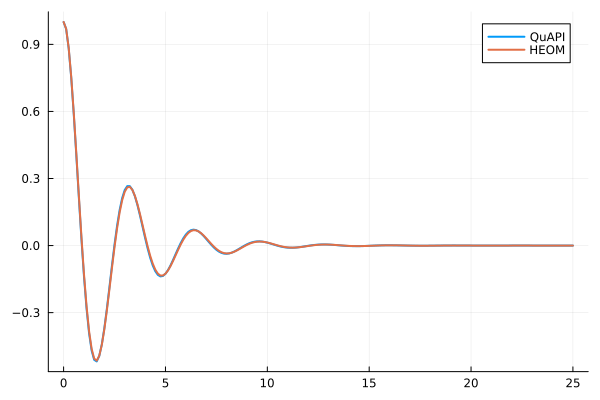

In [5]:
plot(times, real.(ρs[:,1,1].-ρs[:,2,2]), lw=2, label="QuAPI")
plot!(times_HEOM, real.(ρs_HEOM[:,1,1].-ρs_HEOM[:,2,2]), lw=2, label="HEOM")